<a href="https://colab.research.google.com/github/igormerces/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_(Nova_York)_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by:* ***Igor Mercês***

---


# Análise de dados do Airbnb - Nova York
A startup Airbnb é considerada a **maior empresa hoteleira** da atualidade sem possuir um **único hotel**.

Presente em 190 países, o Airbnb pratica o modelo de negócio do tipo plataforma multilateral, conectando turístas (consumidores) a donos de locais para hospedágem (fornecedores) em sua plataforma digital de maneira **prática** e **inovadora**.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Com o objetivo de fornecer dados para análises dos impacto do Airbnb na economia imobiliária local, o portal open source [inside Airbnb](http://insideairbnb.com/get-the-data.html) extrai dados da própria plataforma do Airbnb para algumas das principais cidades do mundo e os disponibiliza em seu site para consulta pública. Desta forma, é possível obter uma grade quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flogosmarcas.net%2Fwp-content%2Fuploads%2F2020%2F07%2FAirbnb-Logo-2014-Presente.jpg&f=1&nofb=1"></center>

**Neste *notebook*, são analisados os dados referentes à cidade de Nova York, em busca de insights que podem ser extraídos a partir de dados brutos.**

## Obtenção de dados
Todos os dados deste projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória será utilizado apenas o arquivo

*   `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

Observação: O portal Inside Airbnb mantém o seu *dataset* em constante atualização e, em determinado momento, o conjunto de dados utilizado neste notebook pode ter sofrido atualização que possa provocar diferenças de resultados para esta versão do projeto. Porém, isto não inviabiliza a reutilização deste notebook, sendo necessária apenas uma nova execução do *dataset* de entrada. 




In [1]:
# importação de pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importação do arquivo listing.csv para um Dataframe
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-09-01/visualisations/listings.csv")

## Análise dos dados
Nesta etapa inicial, temos o objetivo de conhecer os dados e observar como eles estão estruturados. Além disso, é possível criar uma consicência situacional básica para a relação entre as variáveis que serão analisadas.

**Discionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome do grupo ao qual o bairro pertence
* `neighbourhood` - Nome do bairro onde se encontra a propriedade
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para aluguel do imóvel
* `minimum_nights` - Quantidade mínima de noites para reserva
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade do imóvel dentro de 365 dias
* `number_of_reviews_ltm` - Quantiade de reviews no último mês
* `license` - Não há informação sobre esta coluna

Antes de iniciar qualquer análise, observamos as **5 primeiras entradas** do *dataset*.

In [3]:
#mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,340,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,408,2021-06-29,5.03,1,208,58,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.54,1,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,204,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,490,2021-08-14,3.64,1,243,17,NaN


### **Quantidade de atributos (variáveis) e entradas existentes no conjunto de dados e tipos das variáveis**
Nesta etapa, identificamos a quantidade de entradas e de variáveis do *dataset* assim como os tipos destas variáveis.

In [4]:
#identificar o volume de dados do dataset
print(f'Entrada:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

#verificar os tipos das variáveis do dataset
df.dtypes

Entrada:	36923
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### Porcentagem de valores ausentes no dataset
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. No início da análise exploratória é importante identificar se existem valores nulos ou ausentes e se estes são significativos quando comparados com o total de entradas existentes.

In [5]:
#quantidade de valores auxentes por variável
df.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                           111
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9296
reviews_per_month                  9296
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           36923
dtype: int64

In [6]:
#exibir a porcentagem em ordem decrescente das variáveis pelos seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
reviews_per_month                 0.251767
last_review                       0.251767
host_name                         0.003006
name                              0.000352
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64


É possível identificar que:
*   A coluna `license` possui 100% dos seus valores ausentes.
*   As colunas `reviews_per_month` e `last_review` possuem aproximadamente 25% dos seus valores ausentes.
*   As colunas `host_name` e `name` possuem aproximadamente 0,3% e 0,03% de valores ausentes respectivamente.


### Distribuição das variáveis
Para visualizar a distribuição das variáveis, um histograma é muito útil.

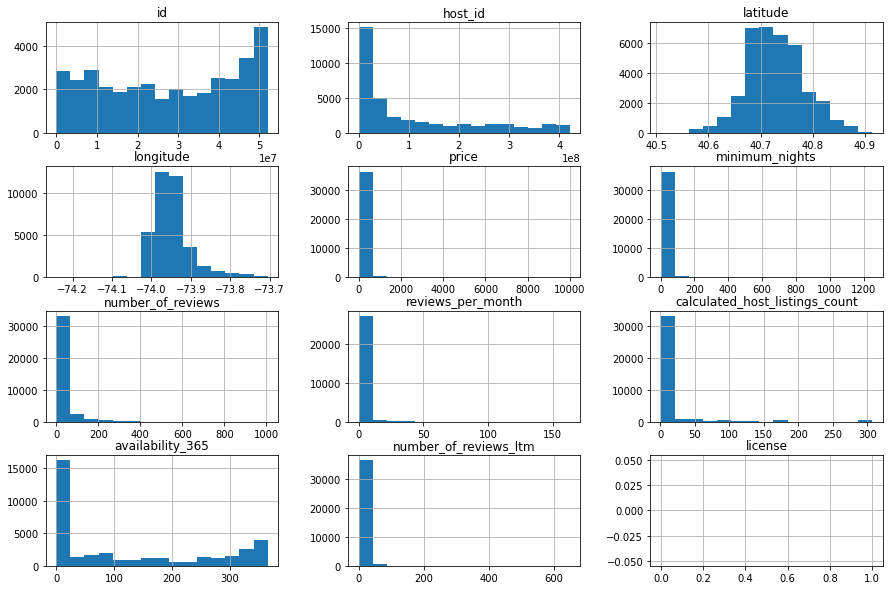

In [7]:
#plotar histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Verificação de *Outliers*
Pela distribuição dos histogramas, é possível observar a presença de *outliers*, como por exemplo nas variáveis `price` e `minimum_nights`.

Os valores não seguem uma distruição e distorcem toda a representação gráfica. Há duas maneiras rápidas que auxiliam na detecção de *outliers* e estas são:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


#### Resumo estatístico

In [8]:
#utilizar o método describe para obter o resumo estatístico
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,36923.000000,36923.000000,36923.000000,27627.000000,36923.000000,36923.000000,36923.000000
mean,169.186009,22.593885,22.986350,1.452372,13.590743,124.059827,4.056550
std,299.117445,29.999673,49.393115,4.047668,45.119156,138.550591,13.919655
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,70.000000,3.000000,0.000000,0.110000,1.000000,0.000000,0.000000
50%,110.000000,30.000000,4.000000,0.440000,1.000000,61.000000,0.000000
75%,184.000000,30.000000,19.500000,1.510000,3.000000,266.000000,2.000000
max,10000.000000,1250.000000,1006.000000,163.190000,307.000000,365.000000,650.000000


Observando o resumo estatístico acima, podemos destacar que:


*   A variável `price` possui 75% dos seus valores abaixo de 184, porém possui valor máximo de 10000.
*   A variável `minimum_nights` (mínimo de noites) possui valor máximo de 1250, acima de 365 noites.



####Boxplot para price

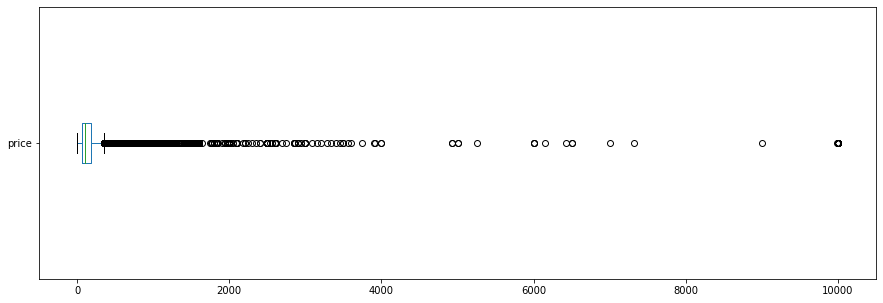


Valores acima de 500:
-- 1321 entradas
-- 3.5777% em relação ao total


In [27]:
#boxplot para a variável price
df.price.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

#ver quantidade de valores acima de 500
print("\nValores acima de 500:")
print(f'-- {df[df.price > 500].shape[0]} entradas')
print(f'-- {(df[df.price > 500].shape[0] / df.shape[0])*100:.4f}% em relação ao total')

####Boxplot para minimum_nights

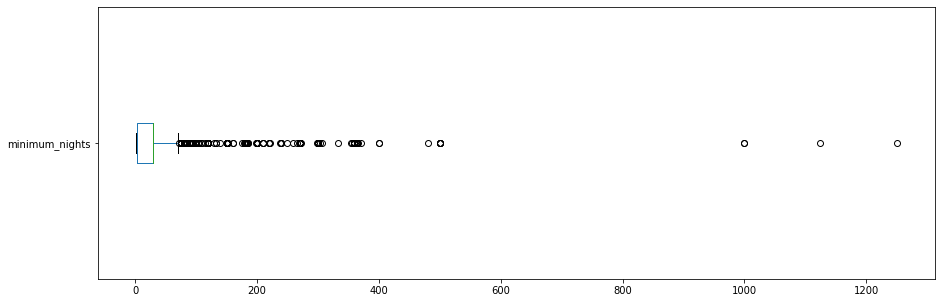


Valores acima de 30:
-- 1435 entradas
-- 3.8865% em relação ao total


In [10]:
#boxplot para variável a minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

#ver quantidade de valores acima de 30
print('\nValores acima de 30:')
print(f'-- {df[df.minimum_nights > 30].shape[0]} entradas')
print(f'-- {(df[df.minimum_nights > 30].shape[0] / df.shape[0])*100:.4f}% em relação ao total')

#### Histograma sem *outliers*
Após a idendificação dos *outliers*, podemos limpar o *dataframe* retirando estes valores das variáveis `price` e `minimum_nights` e, em seguida, plotar um novo histograma.

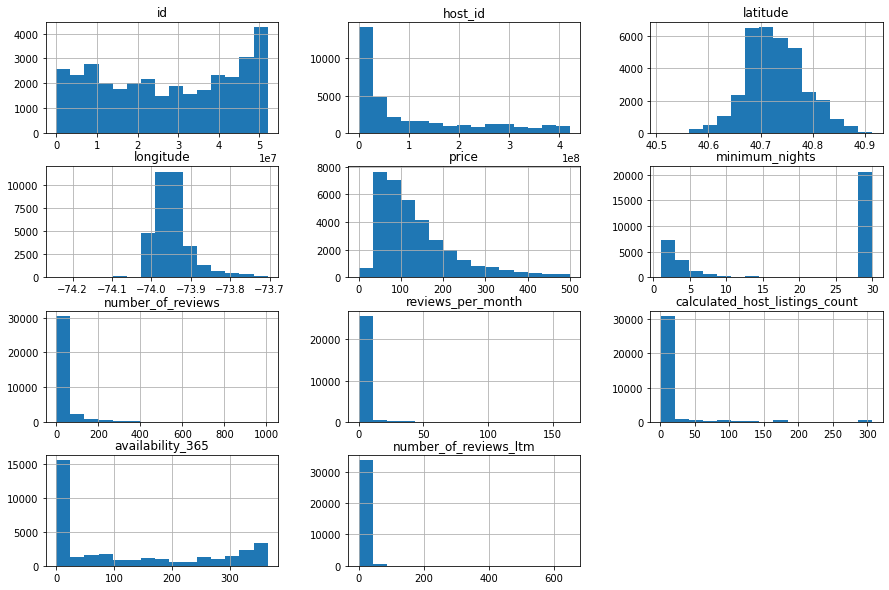

In [11]:
#copiar o dataframe
df_limpo = df.copy()

#remover os outliers do novo dataframe
df_limpo.drop(df_limpo[df_limpo.price > 500].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index, axis=0, inplace=True)

#remover variável license, pois é vazia
df_limpo.drop('license', axis=1, inplace=True)

#plotar histograma para as variáveis numéricas
df_limpo.hist(bins=15, figsize=(15, 10));

### Correlação entre as variáveis
A correlação descreve a associação entre duas variáveis. Para sabermos a relação linear entre as variáveis do *dataset*, estabelecemos o coeficiente de correlação por meio de duas etapas:


*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`



In [12]:
#criar matriz do coeficiente de correlação
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.066713,-0.032006,0.025726,0.054541,0.127700,0.029712
minimum_nights,-0.066713,1.000000,-0.271560,-0.294313,0.141907,-0.186152,-0.342814
number_of_reviews,-0.032006,-0.271560,1.000000,0.312388,-0.103784,0.130538,0.527097
reviews_per_month,0.025726,-0.294313,0.312388,1.000000,-0.004783,0.137455,0.618362
calculated_host_listings_count,0.054541,0.141907,-0.103784,-0.004783,1.000000,0.227342,-0.039214
availability_365,0.127700,-0.186152,0.130538,0.137455,0.227342,1.000000,0.125000
number_of_reviews_ltm,0.029712,-0.342814,0.527097,0.618362,-0.039214,0.125000,1.000000


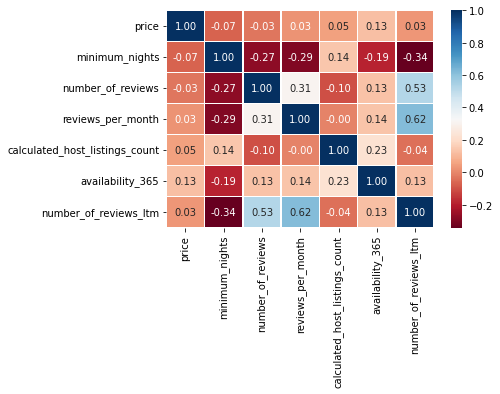

In [13]:
#plotar heatmap utilizando seaborn
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f', linewidths=0.5);

### Tipo de imóvel mais frequente no Airbnb
A variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências e o tipo de cada aluguel, usando o método `value_counts()`.

In [14]:
#mostrar quantidade e tipo de aluguéis disponíveis
df_limpo.room_type.value_counts()

Entire home/apt    17967
Private room       15496
Shared room          548
Hotel room           214
Name: room_type, dtype: int64

In [15]:
#mostrar a frequência em porcentagem
df_limpo.room_type.value_counts() / df_limpo.shape[0]

Entire home/apt    0.524967
Private room       0.452768
Shared room        0.016012
Hotel room         0.006253
Name: room_type, dtype: float64

### Localidades mais caras em Nova York
Utilizando o método `groupby`, vamos agrupar os valores para `neighbourhood` (bairros) e comparamos eles a partir do preço de locação.

In [29]:
df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:25]

neighbourhood
Tottenville           389.000000
Willowbrook           309.000000
Todt Hill             279.000000
Tribeca               250.537190
Theater District      224.230159
Navy Yard             221.600000
Belle Harbor          221.166667
NoHo                  218.594595
Flatiron District     215.116667
DUMBO                 214.181818
West Village          209.207317
Midtown               208.930739
Eltingville           205.250000
Neponsit              200.000000
Gerritsen Beach       200.000000
Greenwich Village     199.582090
Civic Center          193.756757
Nolita                192.438144
Financial District    190.955665
Chelsea               190.895801
SoHo                  188.672811
Cobble Hill           187.578947
Arverne               187.120000
Arden Heights         184.750000
Murray Hill           180.996805
Name: price, dtype: float64

Mesmo para quem não é familiarizado com a vizinhança de Nova York, após uma pequisa rápida, podemos nos informar que bairros como **Soho**, **Tribeca** e **Flatiron District** são uns dos bairros mais valorizados da cidade. Porém, na lista acima observamos que bairros mais modestos como Tottenville e Navy Yard, um bairro no distrito naval da cidade, ocupam posições superiores aos bairros conhecidamente mais valorizados.

Vamos buscar entender o motivo para este fato.

In [34]:
#ver quantidade de imóveis em Tottenville
print(f'Entradas:\t{df_limpo[df_limpo.neighbourhood == "Tottenville"].shape[0]}')

#ver as entradas com imóveis em Tottenville
df_limpo[df_limpo.neighbourhood == 'Tottenville']

Entradas:	1


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
826,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50863,-74.24135,Entire home/apt,389,3,79,2021-06-28,1.19,1,296,9


In [35]:
#ver quantidade de imóveis em Navy Yard
print(f'Entradas:\t{df_limpo[df_limpo.neighbourhood == "Navy Yard"].shape[0]}')

#ver as entradas com imóveis em Navy Yard
df_limpo[df_limpo.neighbourhood == 'Willowbrook']

Entradas:	5


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17694,27088022,Bright and Spacious Gorgeous Home,103450258,Asaf,Staten Island,Willowbrook,40.59919,-74.13389,Entire home/apt,309,4,24,2021-08-23,0.67,3,357,5


Podemos observar que os bairros de Tottenville e Navy Yard possuem 1 e 5 imóveis disponíveis respectivamente. A pouca quantidade de imóveis nesses bairros causa uma **falsa realidade** de que a média de preço do aluguel é **alta**.


### Mapa dos imóveis
É possível plotar cada imóvel no mapa utilizando as suas informações de **latitude** e **longitude**. Para isso, podemos utilizar um gráfico de **dispersão** com as coordenadas `x=longitude` e `y=latitude`.

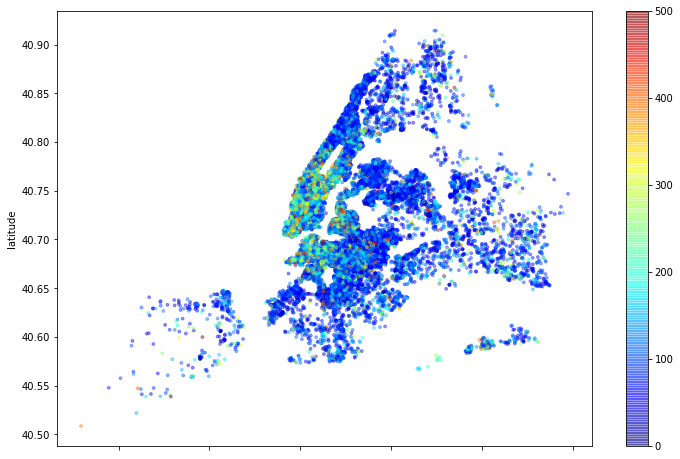

In [37]:
# plotar os imóveis pela latitude e longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8), );

## Conclusão

Neste projeto, foi feita uma análise superficial da base de dados do Airbnb, porém foi possível perceber a existência de *outliers* em algumas variáveis que distorcem as informações estatísticas retirada do conjunto inteiro de dados.

A presença de bairros com poucos imóveis foi fundamental para afirmar a hipótese dos *outliers* e contribuiram para que houvesse um tratamento da base de dados utilizada.

O *dataset* utilizado é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completo, com mais atributos disponíveis para uma análise mais detalhada, permitindo atribuir conlcusões mais profundas aos dados analisados.